# Predictive Analytics in NCAA Men's College Basketball: A Tournament Outcome Study

## 1. Introduction
With the growing interest in the field of sports analytics, the NCAA Men's College Basketball Tournament offers an interesting case study for the application of predictive modeling, owing to its inherent unpredictability. Evaluating the strength of each team in the tournament becomes a difficult task because, with 362 Division 1 men's basketball teams, the vast majority of teams that play in the tournament will not have played each other in the regular season.

Hence, we aim to answer the following predictive question: 

> *Can we predict the POSTSEASON variable in our dataset based on our predictor variables?*

In particular, we will focus on data compiled from **2013-2019** and **2021-2023**. The 2020 season's data set is kept separate from the other seasons, because there was no postseason due to the Coronavirus.

### Dataset Description
We will be using the *College Basketball Dataset* dataset by ANDREW SUNDBERG, available on Kaggle<sup>[1]</sup>. encapsulates key statistical measures for NCAA Men's College Basketball teams over the seasons spanning from 2013 to 2021. The dataset is comprehensive, with variables that reflect various aspects of basketball performance and are believed to be potential indicators of a team's success in the postseason. Below, we present a full list of the variables included in our analysis:

| Variable                                                  | Unit                         | Description                                                                   |
|-----------------------------------------------------------|------------------------------|-------------------------------------------------------------------------------|
| `POSTSEASON`                                              | N/A                          | Round where the given team was eliminated or where their season ended         |
| `PERC`                                                    | %                            | Number of games won / Number of play                                             
| `G`                                                       | round                        | Number of play                                                                |
| `W`                                                       | round                        | Number of games won                                                           |
| `ADJOE`                                                   | Points/100 possessions                           | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                   |
| `ADJDE`                                                   | Points/100 possessions                           |  Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                  |
| `BARTHAG`                                                 | Probability                  | Power Rating (Chance of beating an average Division I team                    |
| `ORB`                                                     | rebounds/game                | Offensive Rebound Rate                                                        |
| `DRB`                                                     | rebounds/game                | Offensive Rebound Rate Allowed                                                |
| `TOR`                                                     | Rate                         | Turnover Percentage Allowed (Turnover Rate)                                   |
| `EFG_O`                                                   | %                            | Effective Field Goal Percentage Shot                                          |
| `EFG_D`                                                   | %                            | Effective Field Goal Percentage Allowed                                       |
| `FTR`                                                     | Rate                         | Free Throw Rate (How often the given team shoots Free Throws)                 |

## 2. Methods

### Data wrangling

We load our dataset from a url. As part of the process of tidying our dataset we will omit some variables that are either not relevant to our research question or redundant. The data set is split into training and testing sets. We use a distribution of 80% training and 20% testing data.ament run.

### Preliminiary data visualization

We use two series of density plots to visualize the distribution of different potential predictors in the dataset. The first series visualizes team stats sorted by the round each team was eliminated in the NCAA tournament. The second series visualizes team stats sorted by each team's initial seed. Comparison of these two sets of graphs should help to identify profiles of teams that overperform in the regular season.

### Data analysis

We first use forward selection to choose the variables in our dataset to use as predictors in our model. We use 5-fold cross validation to evaluate the most accurate K value for our KNN classification model. Finally, our model will evaluate the teams included in our testing data and we will compare these results to the actual placement of these teams in their tournament run.

### Loading the dataset

In [10]:
install.packages("kknn")
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
cbb <- read_csv("https://raw.githubusercontent.com/naw333/College-Basketball-Data-Science/main/cbb.csv")
head(cbb,n=3)

Rows: 3523 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): TEAM, CONF, POSTSEASON, SEED
dbl (20): G, W, ADJOE, ADJDE, BARTHAG, EFG_O, EFG_D, TOR, TORD, ORB, DRB, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,⋯,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,⋯,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,⋯,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,⋯,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018


### Tidying the dataset

We will omit some variables that are either not relevant to our research question or redundant. Filtering these out has the added benefit of making our data visualization and variable selection later both more comprehensible and easier for the notebook to run. We will explain our reasoning for each variable removed here briefly.

TEAM, CONF, YEAR (College team, conference, year) - None of these are relevant to our research question. The conference a team plays in during the regular season can be an indicator of its strength of schedule. The BARTHAG variable in our dataset already incorporates strength of schedule.

G, W, WAB (Games played, games won, how close a team is to not making the tournament) - A regular season win or loss is not relevant to our model. Furthermore, this is often an insufficient indicator of team strength because schedules vary wildly between college basketball teams.

2P_O, 2P_D, 3P_O, 3P_D, ADJ_T (2 and 3 point shooting and defense, tempo) - Itemizing 2-pointers and 3-pointers in this way carries no benefits for our model. These stats are typically referenced to highlight team strategy rather than team strength. We want to avoid variables such as this because we run the risk of overfitting to old data and making a model that is inflexible to new data. EFG_O and EFG_D effectively combine these variables already.

FTRD, TORD (opposing free throw rate, steal rate) - These are fringe stats that, from a basketball analysis perspective, are poor indicators of what they are meant to evaluate. A defense that doesn't foul much or steals the ball a lot is not a good defense but is playing against a bad offense. Interestingly, the reverse of these (free throw and turnover rate) are thought of as excellent indicators of an offense's consistency.

In [3]:
## Teams that did not make the playoffs are removed. We also remove "First Four" teams eliminated. This happens in a play-in round prior to the tournament and decides the last four teams included in the bracket.
cbb_playoff <- cbb |>
    filter(POSTSEASON != "N/A" & POSTSEASON != "R68") |>
    select(ADJDE, ADJOE, EFG_O, TOR, BARTHAG, ORB, DRB, FTR, EFG_D, POSTSEASON, SEED)
head(cbb_playoff, n=3)

ADJDE,ADJOE,EFG_O,TOR,BARTHAG,ORB,DRB,FTR,EFG_D,POSTSEASON,SEED
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
94.9,123.3,52.6,15.4,0.9531,40.7,30.0,32.3,48.1,2ND,1
93.6,129.1,54.8,12.4,0.9758,32.1,23.7,36.2,47.7,2ND,1
90.4,114.4,53.9,14.0,0.9375,25.5,24.9,30.7,47.7,2ND,3


### Splitting the dataset

In [4]:
set.seed(3)
cbb_split <- initial_split(cbb_playoff, prop = 0.75, strata = POSTSEASON)
cbb_train <- training(cbb_split)
cbb_test <- testing(cbb_split)

In [5]:
## Table shows number of teams in the dataset as well as averages for important metrics.
cbb_summ <- summarize(cbb_train, team_count = nrow(cbb_train), mean_ADJOE = mean(ADJOE), mean_ADJDE = mean(ADJDE), mean_EFG_O = mean(EFG_O), mean_TOR = mean(TOR), mean_BARTHAG = mean(BARTHAG), mean_ORB = mean(ORB), 
                      mean_DRB = mean(DRB), mean_FTR = mean(FTR), mean_EFG_D = mean(EFG_D))
cbb_summ

team_count,mean_ADJOE,mean_ADJDE,mean_EFG_O,mean_TOR,mean_BARTHAG,mean_ORB,mean_DRB,mean_FTR,mean_EFG_D
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
479,111.6088,96.27829,52.30438,17.46138,0.8080806,31.31065,28.37432,35.47724,47.69395


## 3. Preliminary Data Visualization

### Density Plot - Comparative strength of teams eliminated in the first three rounds of March Madness

We want to compare teams that are elminated in the first round of the tournament with teams that are eliminated in the second round and so on for each round in order to find variables capable of distinguishing the advantages held by winning teams. We use a series of density plots to visualize these relationships. A quality variable for the model should show distinct peaks in each succsesive round of the tournament. Only the first three rounds are included in the graph below because the graphs become visually cluttered with all 6 rounds included. Additionally, it is difficult to interpret a density plot of the last few rounds of the tournament because of the diminishing sample size of teams eliminated in each round.

Note: The following statistics should be interpreted as a lower value indicating stronger performance: ADJDE, DRB, EFG_D, and TOR. All of these stats evaluate the scoring of opposing teams in some way, except for TOR, which evaluates turnover rate of an offense.

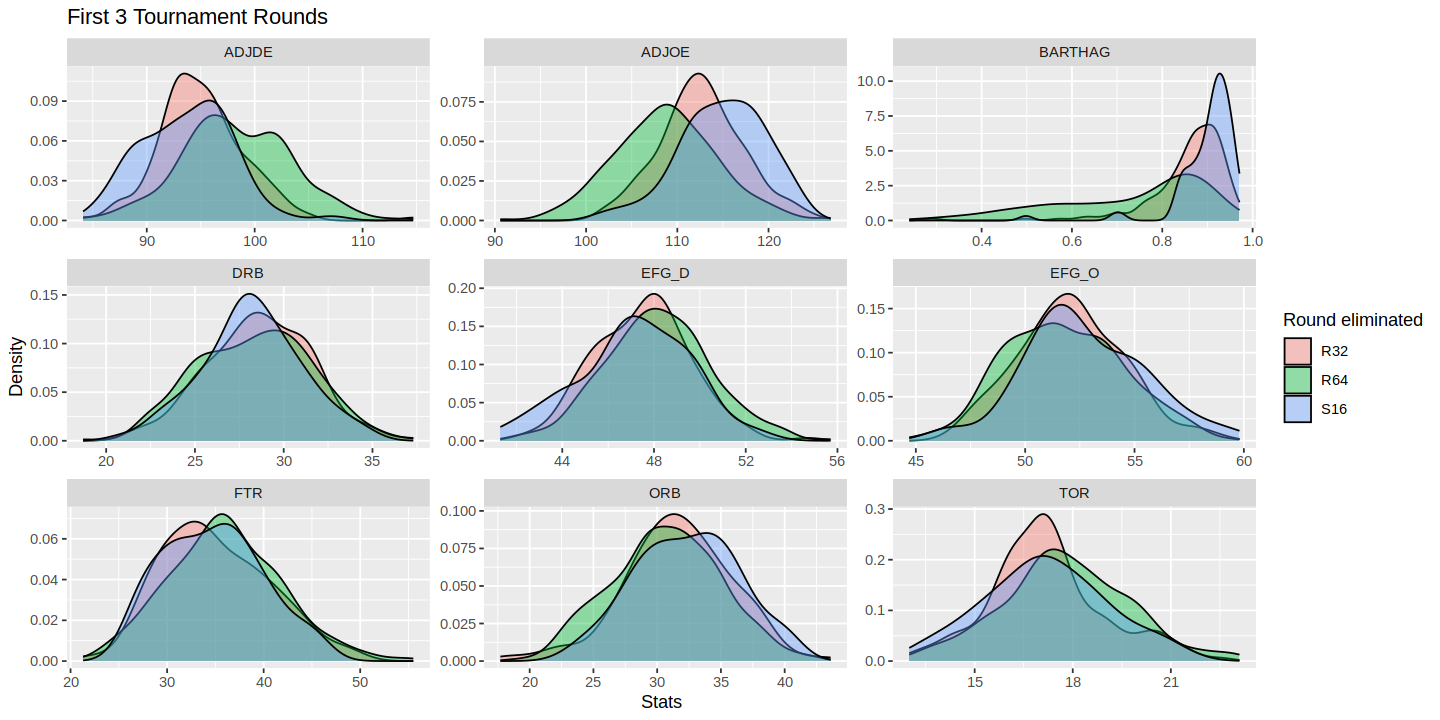

In [6]:
options(repr.plot.height = 6, repr.plot.width = 12)

## Make a subset that contains the variables we want. The data is filtered to only include teams eliminated in the first three rounds for visual clarity while maintaining a high sample size.
cbb_f3 <- cbb_playoff |>
    select(ADJDE, ADJOE, EFG_O, TOR, BARTHAG, ORB, DRB, FTR, EFG_D, POSTSEASON) |>
    filter(POSTSEASON == "R64" | POSTSEASON == "R32" | POSTSEASON == "S16")

## Density plot.
cbb_f3 |>
    pivot_longer(cols = -POSTSEASON, names_to = "category", values_to = "value") |>
ggplot(aes(x = value, fill = POSTSEASON)) +
    geom_density(alpha = 0.4) +
    facet_wrap(facets = vars(category), scales = "free") +
    labs(title = "First 3 Tournament Rounds", x = "Stats", y = "Density", fill = "Round eliminated")

ADJDE, ADJOE, and BARTHAG show the greatest distinction between each round. The first three of these are 'adjusted' to assume each team is playing against an average NCAA basketball team. For example, ADJDE estimates the amount of points an average NCAA offense would score against the team in question. Of the remaining, most seem to establish a slight, if insignificant, positive trend between successive rounds. TOR, for instance, seems to show a positive trend from the round of 64 to 32, but not the same improvement from 32 to 16. FTR, interestingly, seems to suggest an inverse trend. Teams eliminated in the round of 64 tend to have higher free throw rates than teams eliminated later in the tournament.

### Density Plot - Comparative strength of 4, 8, and 12 seeds in March Madness

As previously discussed, the task of our model is to seed March Madness more accurately than the NCAA. The density plots below are derived from where teams are seeded by the NCAA before playing any playoff games. The format is meant to mirror the plots above for comparison between the two sets. This comparison may reveal predictors that are undervalued in the current seeding process. Implementing these predictors in our own analysis could give our model an edge in predicting 'upsets' in the tournament.

The seeds chosen are not arbitrary. While there are no similar sample size concerns as above (there are four teams with a 1 seed, four with a 2 seed and so on), choosing the 4, 8, and 12 seeds here mirrors the format above. A 12 seed, for instance, is an 'underdog' in the first round as they play against a 5 seed. An 8 seed is favored against a 9 seed in the first round, but likely has to play a 1 seed in the 2nd round. A 4 seed is favored up until the third round if the rest of the bracket unfolds as expected.

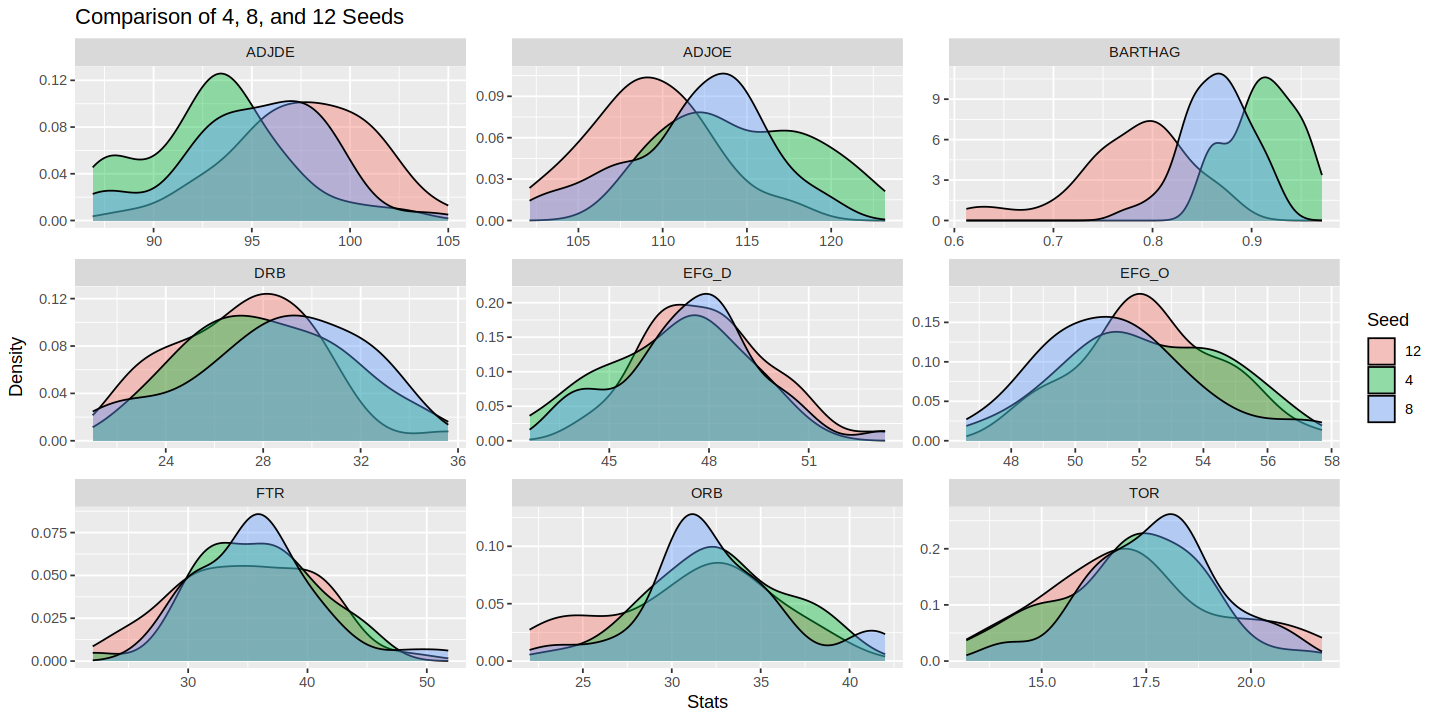

In [7]:
options(repr.plot.height = 6, repr.plot.width = 12)

## Make a subset that contains the variables we want. The data is filtered to only include teams seeded 4, 8, and 12.
cbb_seed <- cbb_playoff |>
    select(ADJOE, ADJDE, EFG_O, TOR, BARTHAG, ORB, DRB, FTR, EFG_D, SEED) |>
    filter(SEED == "4" | SEED == "8" | SEED == "12")

## Density plot.
cbb_seed |>
    pivot_longer(cols = -SEED, names_to = "category", values_to = "value") |>
ggplot(aes(x = value, fill = SEED)) +
    geom_density(alpha = 0.4) +
    facet_wrap(facets = vars(category), scales = "free") +
    labs(title = "Comparison of 4, 8, and 12 Seeds", x = "Stats", y = "Density", fill = "Seed")

ADJDE, ADJOE, and BARTHAG again seem to most decisively separate these groups of teams. Generally, a wider distribution of densities is observed across all variables. One interesting point is the density distributions of 4 seeds have multiple peaks for many of these stats. This would imply there are some 4 seeds that are markedly better than their peers. If these teams outperform higher seeded teams in the NCAA tournament, our model should be able to identify these teams and rank them higher than the seed they were given.

### Data Analysis

The data analysis includes these following steps:
1. Selecting predictors with forward selection;
2. Visualizing selected predictor variables;
3. Selecting a k-value; and
4. Evaluating the tuned knn classification model.

### 1. Selecting predictors with forward selection

Due to the high number of variables, it is hard to determine the combination of variables to produce the most accurate KNN classification model as it may both bring up the computational complexity and consume the memory. As such, we utilized forward selection on the selected 
variables to choose the subsets that results in the best accuracy. 

In [8]:
cbb_subset <- cbb_train|> select(POSTSEASON,
                                 ADJOE,
                                 ADJDE,
                                 BARTHAG,
                                 DRB,
                                 EFG_D,
                                 EFG_O,
                                 FTR,
                                 TOR,
                                 ORB)
names <- colnames(cbb_subset|>select(-POSTSEASON))
head(cbb_subset)

example_formula <- paste("POSTSEASON", "~", paste(names,collapse="+"))
example_formula

POSTSEASON,ADJOE,ADJDE,BARTHAG,DRB,EFG_D,EFG_O,FTR,TOR,ORB
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Champions,123.0,89.9,0.9736,25.4,44.7,55.2,29.1,14.7,30.4
Champions,123.1,90.9,0.9703,29.4,46.7,56.1,34.1,16.3,28.2
Champions,128.4,94.1,0.9725,27.1,48.5,59.5,29.4,15.0,29.6
Champions,112.5,91.3,0.9171,32.8,44.6,51.5,38.3,17.3,30.4
Champions,115.9,84.5,0.9743,33.3,44.8,50.6,40.0,18.3,38.2
E8,109.4,87.4,0.9290,30.8,44.0,47.7,38.7,17.2,34.7


[1] "POSTSEASON ~ ADJOE+ADJDE+BARTHAG+DRB+EFG_D+EFG_O+FTR+TOR+ORB"

As an example, the model that uses all predictors would look like this.

Generally, the process below has two for loops to do these two things:
1. increase the predictor set sizes (add one new predictor from the selected variables).
2. check which variable is the predictor that we need to keep. 

In [11]:
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())
#create model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

#create 5-fold cross validation object 
cbb_vfold <- vfold_cv(cbb_subset, v = 5, strata = POSTSEASON)

#store the total number of predictors
n_total <- length(names)

#store selected predictors 
selected <- c()

#for every size form 1 to the toal number of predictors
for (i in 1:n_total) {
    #for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)){
        # create model string for this combinatin of predictors
        preds_new <- c(selected,names[[j]])
        model_string <- paste ("POSTSEASON", "~", paste(preds_new, collapse = "+"))

        #create a recipe from the model string 
        cbb_recipe <- recipe(as.formula(model_string),
                            data = cbb_subset) |>
                        step_scale(all_predictors())|>
                        step_center(all_predictors())

        #tune the KNN classifier with there predictors,
        #and collect the accuracy for the best K
        acc <- workflow()|>
            add_recipe(cbb_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = cbb_vfold, grid = 10) |>
            collect_metrics() |>
            filter(.metric == "accuracy") |>
            summarize(mx = max(mean))
        acc <- acc$mx |> unlist()
    
        #add this result to the dataframe 
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
        add_row(size = i,
                model_string = models[[jstar]],
                accuracy = accs[[jstar]])
        selected <- c(selected, names[[jstar]])
        names <- names[-jstar]
}
accuracies

! Fold1: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2ND'
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold2: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ch...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold4: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2ND'


size,model_string,accuracy
<int>,<chr>,<dbl>
1,POSTSEASON ~ EFG_O,0.5052634
2,POSTSEASON ~ EFG_O+BARTHAG,0.5050450
3,POSTSEASON ~ EFG_O+BARTHAG+TOR,0.5155069
4,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE,0.5072371
5,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB,0.5113398
6,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB+ADJOE,0.5281590
7,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB+ADJOE+EFG_D,0.5195648
8,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB+ADJOE+EFG_D+FTR,0.5093866
9,POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB+ADJOE+EFG_D+FTR+DRB,0.4948239


From the results of the forward selection process, we concluded that the best recipe is: POSTSEASON ~ EFG_O+BARTHAG+TOR+ADJDE+ORB+ADJOE (add up implications in basketball). This recipe could be interpreted as Effective Field Goal Percentage Shot, Power Rating, Turnover Percentage Allowed, Adjusted Defensive Efficiency, Offensive Rebound Rate and Adjusted Offensive Efficiency determine the traits of the teams' postseason rankings. 

In [ ]:
# Select only relevant predictors.
#BARTHAG+ORB+ADJOE+DRB+ADJDE
PREDICTOR_VARIABLES <- c("BARTHAG", "DRB", "ADJDE", "ORB", "ADJOE")

cbb_training_data_predictor_selected <- cbb_train |>
    select(POSTSEASON, all_of(PREDICTOR_VARIABLES))

head(cbb_training_data_predictor_selected)

### 2. Visualizing selected predictors

A scatterplot matrix and parallel coordinates plot are used to highlight the relationships between the selected predictor variables.

In [ ]:
options(repr.plot.height = 12, repr.plot.width = 24)

cbb_training_data_predictor_selected |>
    # Normalize the data.
    select(all_of(PREDICTOR_VARIABLES)) |>
    scale() |>
    bind_cols(POSTSEASON = cbb_training_data_predictor_selected$POSTSEASON) |>

    # Create a scatterplot matrix.
    ggpairs(aes(alpha = 0.4, colour = POSTSEASON), columns = 1:length(PREDICTOR_VARIABLES)) +
        labs(title = "Scatterplot Matrix of Predictors with Correlation Coefficients") +
        theme_minimal() +
        theme(text = element_text(size = 20))

Figure 2.2 Scatter Plot Matrix of Predictors and Correlation Coefficients

In [ ]:
options(repr.plot.height = 12, repr.plot.width = 24)

cbb_training_data_predictor_selected |>
    # Create a parallel coordinates plot.
    ggparcoord(alpha = 0.5, columns = 2:ncol(cbb_training_data_predictor_selected),
               groupColumn = "POSTSEASON", splineFactor = 9, order = "anyClass", scale = "centerObs") + 
        labs(title = "Parallel Coordinates Plot of Predictors",
             x = "Value", y = "Variable", color = "Round") +
        guides(color = guide_legend(override.aes = list(size = 10))) +
        theme_minimal() +
        theme(text = element_text(size = 20), legend.pos = "top")

Figure 2.3 Parallel Coordinate Graph for Predictors

Place holder text when the kernel is backed up will fill in.(The correlation coefficients from the scatterplot matrix are not particularly relevant for our analysis—for the purposes of KNN classification, we are more interested in the clustering of the data. From the matrix, we see that the genres do not tend to form highly distinct clusters. While observations from a particular genre often fall into similar ranges, these ranges usually overlap considerably.

In the parallel coordinates plot, each observation is represented by a line that passes through its values for each predictor variable. We find that the rms_var and zero_crossing_rate_var tend to have similar values regardless of genre, whereas the other 4 predictors instead have diverse values with clear "banding" by genre. This suggests that differences in these traits are defining characteristics of each genre.

Overall, the classical, rock, and pop genres appear distinct enough to classify using KNN. In general, pop tends to have relatively high values for predictor variables; classical has lower values, and rock is in-between. On the other hand, jazz may be difficult to classify using KNN as it has a strong overlap with every other genre. This indicates that it may be difficult to distinguish from the other genres. We expect a somewhat higher rate of misclassification for this genre.

The large overlap in the distributions of the predictor variables may signal that we should choose a higher 
-value for our classifcation model. There are likely to be points in at least two genres near any new observations, so increasing the sample size should produce more accurate results.)

### 3. Selecting k-value

Now that the predictor variables have been determined, we must pick an optimal k value for the KNN classification model.

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 12)
basket_recipe <- recipe(POSTSEASON ~ BARTHAG+ORB+ADJOE+DRB+ADJDE, data = cbb_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 

basket_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
          set_engine("kknn") |>
          set_mode("classification")
    
basket_vfold <- vfold_cv(cbb_train, v = 5, strata = POSTSEASON)

basket_workflow <- workflow() |>
          add_recipe(basket_recipe) |>
          add_model(basket_spec)

k_vals <- tibble(neighbors = seq(1:100))

basket_results <- basket_workflow|>
                        tune_grid(resamples = basket_vfold, grid = k_vals)|>
                        collect_metrics()

accuracies <- basket_results|> filter(.metric == "accuracy")
cross_val_plot <- accuracies|>ggplot(aes(x = neighbors, y=mean)) + 
                                    geom_point()+
                                    geom_line()+
                                    labs(title = "KNN classification model accuracy for different K values",
                                         x = "Neighbors", 
                                         y = "Accuracy Estimate")
cross_val_plot

Figure 2.4 Graph of K-value vs. Model Accuracy

From the graph, we observe two distinct peaks at k = 8 and k = 24. Both peaks are similar in accuracy with 52% and 50% respectively.

Since a lower k-value would make the final model to overfit the data, we choose k = 24 to be the k-value. 

In [ ]:
# Create the final model specification using selected k.
tuned_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |> 
    set_engine("kknn") |> 
    set_mode("classification")

# Create the final workflow.
tuned_workflow <- workflow() |> 
    add_recipe(basket_recipe) |> 
    add_model(tuned_knn) |> 
    fit(data = cbb_train)

### 4. Evaluate the tuned KNN classification model

Lastly, the trained model is evaluated on the testing data. The use of new "unseen" testing data is important to verify model generality and prevents overfitting bias.

In [ ]:
# Use the model to perform classification on the testing data.
cbb_preds <- tuned_workflow |> 
    predict(cbb_test) |> 
    bind_cols(cbb_test)

# Compute the final accuracy.
cbb_accuracy <- cbb_preds |> 
    metrics(truth = POSTSEASON, estimate = .pred_class) |> 
    filter(.metric == "accuracy") |>
    pull(.estimate)

# Display the confusion matrix.
cbb_preds |> 
    conf_mat(truth = POSTSEASON, estimate = .pred_class)

paste("KNN classification model accuracy: ", cbb_accuracy)

Figure 2.5: Confusion Matrix for the KNN Model